In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!nvidia-smi

Wed Mar 31 05:32:18 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [27]:
import keras
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import models
from keras import layers

In [15]:
import matplotlib.pyplot as plt
import numpy as np

## 1. Load IMDB Dataset
- Word to Vector
- 전체 데이터 내에서 단어의 사용빈도에 따라 인덱스화
- 정수인덱스 '11'은 11번째로 자주 사용된 단어를 나타냄
- num_words = 10000: 인데스값 10000 이하의 단어만 추출
- 단어 인덱스 값이 10000을 넘지 않는 단어만 분석에 사용

In [5]:
(X_train, y_train) , (X_test, y_test) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 0s 0us/step


In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

## 2. Visualization & Frequency
- x - Histogram (리뷰 길이)

In [12]:
print('리뷰 최대 길이: ' , max(len(l) for l in X_train))
print('리뷰 평균 길이: ' , sum(map(len, X_train))/len(X_train))

리뷰 최대 길이:  2494
리뷰 평균 길이:  238.71364


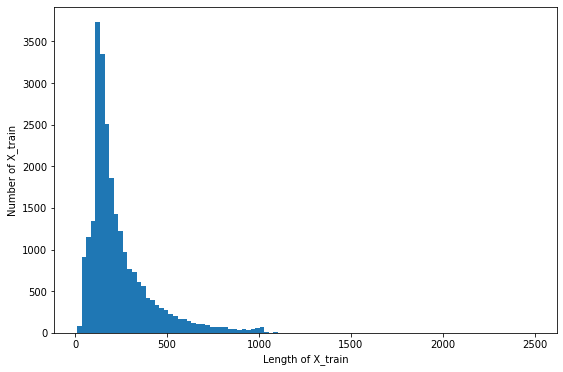

In [14]:
plt.figure(figsize = (9, 6))
plt.hist([len(l) for l in X_train] , bins = 100)
plt.xlabel('Length of X_train')
plt.ylabel('Number of X_train')
plt.show()

- y - Frequency(0: 부정, 1: 긍정)

In [16]:
unique_elements, counts_elements = np.unique(y_train, return_counts = True)

print('Label 빈도수:')
print(np.asarray((unique_elements, counts_elements)))

Label 빈도수:
[[    0     1]
 [12500 12500]]


## 3. Tensor Transformation

### 1) X_train & X_test (25000, 10000)
- vectorization
  - (25000, 10000)

In [18]:
X_train = sequence.pad_sequences(X_train, maxlen = 10000)
X_test = sequence.pad_sequences(X_test, maxlen = 10000)

X_train.shape, X_test.shape

((25000, 10000), (25000, 10000))

- Transformation Check

In [24]:
print(X_train[0][:21])
print(X_train[0][9979:])

print(X_test[0][:21])
print(X_test[0][9979:])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[ 226   65   16   38 1334   88   12   16  283    5   16 4472  113  103
   32   15   16 5345   19  178   32]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  14  286  170    8  157   46    5   27  239   16  179    2   38   32
   25 7944  451  202   14    6  717]


### 2) y_train & y_test

In [25]:
y_train = np.asarray(y_train).astype(float)
y_test = np.asarray(y_test).astype(float)

In [26]:
print(y_train[:21])
print(y_test[:21])

[1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.]
[0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]


## 4. Keras Embedding Modeling

### 1) Model Define
- 모델 신경망 구조 정의
  - Embedding Dimension: 32

In [31]:
imdb = models.Sequential()

imdb.add(layers.Embedding(25000, 32, input_length = 10000))

imdb.add(layers.Flatten())

imdb.add(layers.Dense(16))
imdb.add(layers.Dropout(0.5))
imdb.add(layers.Dense(1, activation = 'sigmoid'))

In [33]:
imdb.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10000, 32)         800000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 320000)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                5120016   
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 5,920,033
Trainable params: 5,920,033
Non-trainable params: 0
_________________________________________________________________


In [35]:
imdb.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [36]:
hist_imdb = imdb.fit(X_train, y_train,
                     epochs = 50,
                     batch_size = 512,
                     validation_data = (X_test, y_test))

Epoch 1/50
49/49 [==============================] - 25s 435ms/step - loss: 3.7706 - accuracy: 0.5019 - val_loss: 0.6893 - val_accuracy: 0.5186
Epoch 2/50
49/49 [==============================] - 21s 432ms/step - loss: 0.6043 - accuracy: 0.6895 - val_loss: 0.3872 - val_accuracy: 0.8485
Epoch 3/50
49/49 [==============================] - 21s 433ms/step - loss: 0.3129 - accuracy: 0.8945 - val_loss: 0.2921 - val_accuracy: 0.8774
Epoch 4/50
49/49 [==============================] - 21s 434ms/step - loss: 0.2158 - accuracy: 0.9311 - val_loss: 0.2755 - val_accuracy: 0.8831
Epoch 5/50
49/49 [==============================] - 21s 431ms/step - loss: 0.1602 - accuracy: 0.9546 - val_loss: 0.2746 - val_accuracy: 0.8843
Epoch 6/50
49/49 [==============================] - 21s 432ms/step - loss: 0.1223 - accuracy: 0.9706 - val_loss: 0.2808 - val_accuracy: 0.8843
Epoch 7/50
49/49 [==============================] - 21s 433ms/step - loss: 0.0907 - accuracy: 0.9840 - val_loss: 0.2914 - val_accuracy: 0.8817

### 2) visualization

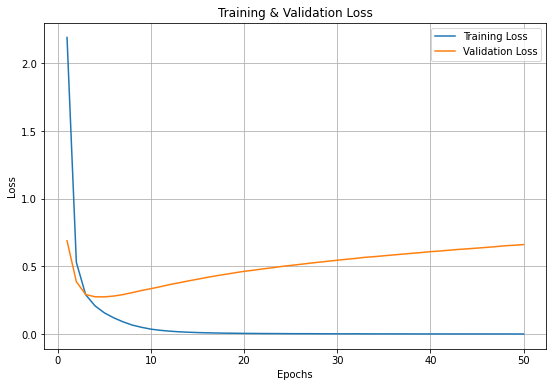

In [37]:
epochs = range(1, len(hist_imdb.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, hist_imdb.history['loss'])
plt.plot(epochs, hist_imdb.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss' , 'Validation Loss'])
plt.grid()
plt.show()

### 3) Model Evaluate

- Loss & Accuracy

In [38]:
loss, accuracy = imdb.evaluate(X_test, y_test)

print('Loss = {:.5f}' .format(loss))
print('Accuracy = {:.5f}' .format(accuracy))

782/782 [==============================] - 9s 11ms/step - loss: 0.6612 - accuracy: 0.8743
Loss = 0.66117
Accuracy = 0.87428
